In [1]:
import pulp

In [3]:
problema = pulp.LpProblem("utilidades",pulp.LpMaximize)
problema

utilidades:
MAXIMIZE
None
VARIABLES

In [4]:
# Variables de decisión
x1 = pulp.LpVariable("x1",lowBound = 0)
x2 = pulp.LpVariable("x2",lowBound = 0)

# Función objetivo
problema += 2*x1 + 3*x2

#Restricciones
problema += 10*x1 +  5*x2 <= 600
problema +=  6*x1 + 20*x2 <= 600
problema +=  8*x1 + 10*x2 <= 600


In [5]:
sol = problema.solve()
sol

1

In [7]:
print('z_max = {0:.4f}, x1 = {1:.4f}, x2 = {2:.4f}'.
     format(pulp.value(problema.objective),pulp.value(x1),pulp.value(x2)))


z_max = 148.2353, x1 = 52.9412, x2 = 14.1176


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

In [14]:
z = np.array([-2,-3]) # coeficientes de la funcion objetivo
A = np.array([[10,5],[6,20],[8,10]]) # coeficientes de las restriciones
b = np.array([600, 600, 600]) #Terminos independientes de las restricciones

In [16]:
resul = linprog(z,A,b, method="revised simplex")
resul

C:\Users\Danie\AppData\Local\Temp\ipykernel_3448\1729861587.py:1: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  resul = linprog(z,A,b, method="revised simplex")


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -148.23529411764707
       x: [ 5.294e+01  1.412e+01]
     nit: 2

In [20]:
print('z_max = {0:.4f}, x1 = {1:.4f}, x2 = {2:.4f}'.
     format(-resul.fun,resul.x[0],resul.x[1]))


z_max = 148.2353, x1 = 52.9412, x2 = 14.1176


In [23]:
def grafico_restric(z, A, b, limites, zz):
    n = A.shape[0]
    print("Número de restricciones:", n)
    plt.figure(figsize=(10,10))
    plt.title("Función objetivo: z = " + " + ".join([str(-x) + "x" + str(i+1) for i, x in enumerate(z)]))
    x = np.linspace(0, 80)
    
    for i in range(0, n):
        z_txt = " + ".join([str(x)+ "x" + str(i+1) for i,x in enumerate(A[i,:])]) + " <= " + str(b[i])
        plt.plot(x, -(x*(A[i, 0] / A[i, 1])) + (b[i] / A[i, 1]), label=z_txt)
    
    for j in range(zz[0], zz[1], zz[2]):
        z_txt = "z = " + str(j)
        plt.plot(x, -(x * (z[0] / z[1])) + (j / z[1]), "--", label=z_txt)
    
    resul = linprog(z, A, b, method="revised simplex")
    plt.plot(resul.x[0], resul.x[1], "ro", label="Solución")
    
    plt.xlim(0, limites[0])
    plt.ylim(0, limites[1])
    plt.legend()
    plt.grid()
    plt.show()

Número de restricciones: 3


C:\Users\Danie\AppData\Local\Temp\ipykernel_3448\604740443.py:16: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  resul = linprog(z, A, b, method="revised simplex")


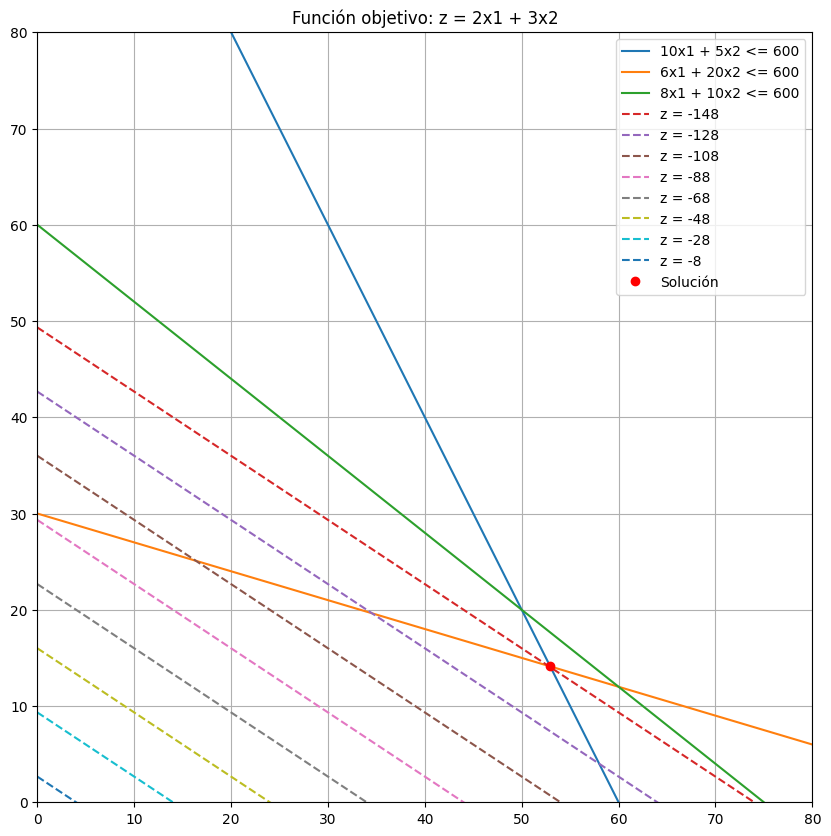

In [24]:
grafico_restric(z,A,b,[80,80],[-148,0,20])